In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import itertools
from collections import defaultdict

import incense
from incense import ExperimentLoader
import pandas as pd

import sys
sys.path.append('../')

from experiments import sacred_auth_details

In [2]:
loader = ExperimentLoader(mongo_uri=sacred_auth_details.db_url, db_name='safe-exploration')

## Recent all experiments

In [4]:
exps_by_time = loader.find({
    '$query':{
        '$or':[{'status': 'COMPLETED'}, {'status': 'RUNNING'},]}, 
    '$orderby':{'start_time':-1}})
exps_by_time.project(on=['host.hostname', 'command', 'start_time', 'status', 'config.cem_ssm', 
                         'config.mpc_time_horizon', 
                         'config.mc_dropout_hidden_features'])[0:10]

,hostname,command,start_time,status,cem_ssm,mpc_time_horizon,mc_dropout_hidden_features
exp_id,,,,,,,
114,oscar-1,regression_comparison_main,2019-07-03 17:16:03.042,COMPLETED,mc_dropout,2,"[64, 64]"
111,oscar-1,regression_comparison_main,2019-07-03 16:29:48.658,COMPLETED,mc_dropout,2,"[64, 64]"
110,oscar-1,regression_comparison_main,2019-07-03 16:26:44.760,COMPLETED,mc_dropout,2,"[64, 64]"
106,Oscars-MacBook-Pro.local,single_step_compare_main,2019-06-20 18:58:59.477,COMPLETED,mc_dropout,2,"[64, 64]"
105,Oscars-MacBook-Pro.local,single_step_compare_main,2019-06-20 18:58:24.809,COMPLETED,mc_dropout,2,"[64, 64]"
104,Oscars-MacBook-Pro.local,single_step_compare_main,2019-06-20 18:57:00.453,COMPLETED,mc_dropout,2,"[64, 64]"
102,Oscars-MacBook-Pro.local,single_step_compare_main,2019-06-20 18:54:55.244,COMPLETED,mc_dropout,2,"[64, 64]"
101,Oscars-MacBook-Pro.local,single_step_compare_main,2019-06-20 18:53:55.966,COMPLETED,mc_dropout,2,"[64, 64]"
95,Oscars-MacBook-Pro.local,single_step_compare_main,2019-06-20 18:36:56.841,COMPLETED,mc_dropout,2,"[64, 64]"


In [13]:
exp = loader.find_by_id(114)
for line in exp.captured_out.split('\n'):
    if line.startswith('Training') or line.startswith('Saved'):
        continue
    print(line)

INFO - sacred_helper - Running command 'regression_comparison_main'
INFO - sacred_helper - Started run with ID "114"
final p 'gal_concrete_iter=3000_hiddensize=20_p=0.100_0': {'conc_drop1': 0.056826937943696976, 'conc_drop2': 0.270812064409256, 'conc_drop_mu': 0.32271236181259155, 'conc_drop_logvar': 0.4213297963142395}
final p 'gal_concrete_iter=3000_hiddensize=20_p=0.100_1': {'conc_drop1': 0.04988206923007965, 'conc_drop2': 0.22302153706550598, 'conc_drop_mu': 0.31023067235946655, 'conc_drop_logvar': 0.42128050327301025}
final p 'gal_concrete_iter=3000_hiddensize=20_p=0.100_2': {'conc_drop1': 0.04423469677567482, 'conc_drop2': 0.2571379840373993, 'conc_drop_mu': 0.2975381016731262, 'conc_drop_logvar': 0.42278429865837097}
final p 'gal_concrete_iter=5000_hiddensize=20_p=0.100_0': {'conc_drop1': 0.04162795469164848, 'conc_drop2': 0.28156137466430664, 'conc_drop_mu': 0.3190189301967621, 'conc_drop_logvar': 0.4580647647380829}
final p 'gal_concrete_iter=5000_hiddensize=20_p=0.100_1': {'c

## Recent main experiments

In [131]:
exps_by_time = loader.find({
    '$query':{
        '$or':[{'status': 'COMPLETED'}, {'status': 'RUNNING'},],
        'command': 'main'}, 
    '$orderby':{'start_time':-1}})
exps_by_time.project(on=['host.hostname', 'start_time', 'status', 'config.cem_ssm', 'config.mpc_time_horizon', 
                         'config.mc_dropout_hidden_features'])[0:10]

,hostname,start_time,status,cem_ssm,mpc_time_horizon,mc_dropout_hidden_features
exp_id,,,,,,
76,75a6e9bd8451,2019-06-20 12:38:12.731,COMPLETED,mc_dropout,2,"[64, 64]"
75,7cb07d618de6,2019-06-20 12:22:33.232,COMPLETED,mc_dropout,2,"[64, 64]"
74,75a6e9bd8451,2019-06-20 12:22:26.497,COMPLETED,mc_dropout,2,"[64, 64]"
73,a9aa9a969f1c,2019-06-20 10:00:48.559,COMPLETED,mc_dropout,2,"[64, 64]"
72,e16a72f51b62,2019-06-20 09:50:48.574,COMPLETED,mc_dropout,2,"[128, 128]"
71,cdeae5a0ef0c,2019-06-20 09:36:21.930,COMPLETED,mc_dropout,2,[64]
70,c16422fcab86,2019-06-20 09:17:02.943,COMPLETED,mc_dropout,2,"[128, 128]"
68,a9aa9a969f1c,2019-06-20 09:16:39.121,COMPLETED,mc_dropout,2,[64]
67,e16a72f51b62,2019-06-20 09:16:34.113,COMPLETED,mc_dropout,2,"[64, 64]"


## Experiment details

In [126]:
exps = loader.find_by_ids([76, 75, 74, 73, 72, 71, 70, 68, 67, 66, 65, 64, 62, 58])

# Make sure all experiments have values for all config keys.
config_keys = set()
for exp in exps:
    config_keys.update(exp.config.keys())

for exp in exps:
    for key in config_keys:
        if key not in exp.config.keys():
            exp.config[key] = '?'
            
# Duplicate all metrics so we can use it multiple times in projections.
for exp in exps:
    exp.info['all_metrics2'] = exp.info.all_metrics

def failure_rate(metrics):
    all_lengths = list(itertools.chain.from_iterable(metrics['episode_length'].values()))
    total_steps = sum(all_lengths)
    failures = len(all_lengths) - all_lengths.count(50)
    percent = failures / total_steps * 100
    return f'{failures}/{total_steps} ({percent:.2f}%)'

def fallback_rate(metrics):
    total_steps = sum(itertools.chain.from_iterable(metrics['episode_length'].values()))
    fallback_steps = sum(itertools.chain.from_iterable(metrics['safe_controller_fallback_count'].values()))
    percent = fallback_steps / total_steps * 100
    return f'{fallback_steps}/{total_steps} ({percent:.2f}%)'

frame = exps.project(on=['config.cem_ssm', 
                         'config.mc_dropout_hidden_features', 
                         'config.mc_dropout_training_iterations',
                         'config.mc_dropout_predict_std',
                         'config.mc_dropout_reinitialize',
                         {'info.all_metrics': failure_rate},
                         {'info.all_metrics2': fallback_rate}])
frame = frame.sort_values(['mc_dropout_hidden_features'])
frame.columns = map(lambda name: name.replace('mc_dropout', 'mcd'), frame.columns)
frame.columns = map(lambda name: name.replace('all_metrics', ''), frame.columns)
frame

,cem_ssm,mcd_hidden_features,mcd_training_iterations,mcd_predict_std,mcd_reinitialize,_failure_rate,2_fallback_rate
exp_id,,,,,,,
71,mc_dropout,[64],3000,True,?,32/1113 (2.88%),748/1113 (67.21%)
68,mc_dropout,[64],6000,True,?,32/1045 (3.06%),736/1045 (70.43%)
64,mc_dropout,[64],1000,True,?,34/955 (3.56%),732/955 (76.65%)
76,mc_dropout,"[64, 64]",3000,True,True,41/610 (6.72%),403/610 (66.07%)
75,mc_dropout,"[64, 64]",6000,True,True,37/845 (4.38%),572/845 (67.69%)
74,mc_dropout,"[64, 64]",1000,True,True,40/689 (5.81%),507/689 (73.58%)
73,mc_dropout,"[64, 64]",6000,True,?,37/835 (4.43%),566/835 (67.78%)
67,mc_dropout,"[64, 64]",3000,True,?,34/979 (3.47%),691/979 (70.58%)
65,mc_dropout,"[64, 64]",1000,True,?,34/1038 (3.28%),691/1038 (66.57%)


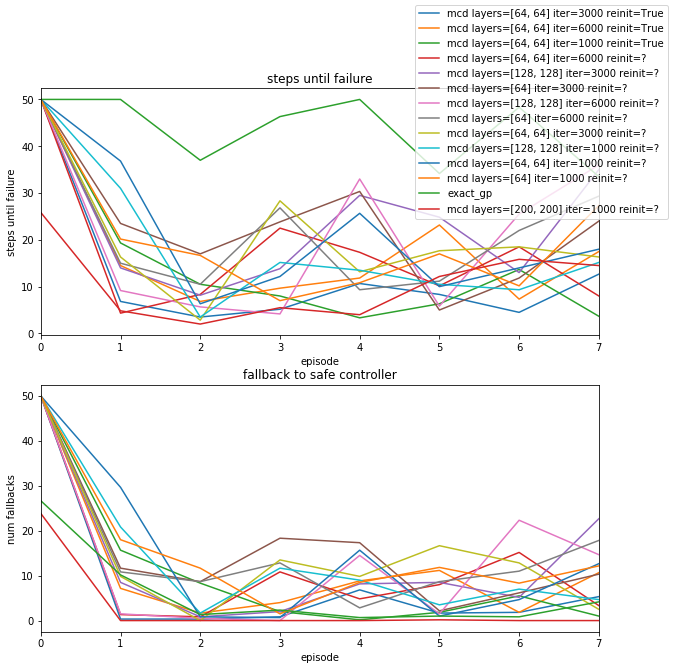

In [123]:
def get_label(exp):
    c = defaultdict(lambda: '?', exp.config)
    if exp.config['cem_ssm'] == 'exact_gp':
        return f'exact_gp'
    elif exp.config['cem_ssm'] == 'mc_dropout':
        return (f'mcd layers={c["mc_dropout_hidden_features"]} '
                f'iter={c["mc_dropout_training_iterations"]} '
                f'reinit={c["mc_dropout_reinitialize"]}')
    else:
        return exp.config['cem_ssm']

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

for exp in exps:
    label = get_label(exp)
    exp.metrics['episode_length'].plot(ax=axes[0], label=label)
    exp.metrics['safe_controller_fallback_count'].plot(ax=axes[1], label='')
    
axes[0].set_ylabel('steps until failure')
axes[0].set_xlabel('episode')
axes[0].set_title('steps until failure')

axes[1].set_ylabel('num fallbacks')
axes[1].set_xlabel('episode')
axes[1].set_title('fallback to safe controller')

fig.legend()